In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

kiva = pd.read_csv("kiva_total.csv")
kiva.head()


,Unnamed: 0,business_description,business_name,city,conversations,disbursed,industry,invited_lenders,listed,loan_id,...,borrower_ethnicity,gender,borrower_education,borrower_internet_frequency,borrower_primary_language,business_url,business_twitter_url,business_facebook_url,business_yelp_url,social_media
0,839,"Business Description\rIn 2009, I rented a gara...",Pacific Brewing Laboratory,"San Francisco, CA",7.0,12/9/11,Food production,0,11/28/11,15,...,caucasian,male,college,daily,English,http://www.pacbrewlab.com,NaN,NaN,NaN,1
1,841,Business Description\rNeighborhood Coffee Shop...,Cafeto Coffee Shop,"San Francisco, CA",15.0,12/21/11,Restaurant / Caterers,0,11/29/11,17,...,hispanic,male,primary,weekly,Spanish,NaN,NaN,NaN,http://www.yelp.com/biz/cafeto-san-francisco,1
2,318,"Business Description\rHello everyone, please a...",Nail Studio,"San Francisco, CA",NaN,12/21/11,Beauty / Cosmetics,0,11/29/11,18,...,hispanic,female,college,daily,Other,NaN,NaN,NaN,NaN,0
3,316,Business Description\rSaafara is a line of pre...,"Saafara Tea (Group Helene Samb, LLC)","San Francisco, CA",14.0,12/23/11,Food production,0,12/14/11,19,...,african_american,male,college,daily,"Wolof, French and English",http://saafara.com,NaN,NaN,NaN,1
4,1383,Business Description\rPFC is a San Francisco H...,Planet Fillmore Communications (PFC),"San Francisco, CA",5.0,12/23/11,Communications / Media,0,12/6/11,21,...,african_american,male,college,daily,English,http://www.youtube.com/user/PlanetFillmore,NaN,NaN,NaN,1


In [169]:
kiva.drop([1787], inplace=True)
kiva[['loan_id', 'size']].sort_index(by='size')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,loan_id,size
260,1194,100
1601,14908,200
355,1554,200
874,5296,300
1615,15127,300
2414,18276,300
872,5292,400
1501,13796,450
1609,15005,500
1605,14943,500


In [170]:
kiva['city'] = kiva['city'].str.upper()

kiva['state'] = kiva.city.str[-2] + kiva.city.str[-1]

In [171]:
kiva['trustee_new'] = [0 if x == "Borrowers Network " else 1 for x in kiva.trustee]

In [172]:
kiva['text'] = kiva.loan_purpose +' '+ kiva.personal_story + " "+ kiva.business_description

In [173]:
kiva['prediction'] = kiva.Bucket.mean()

In [174]:
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(kiva.Bucket, kiva.prediction))

1.874937807096452

In [175]:
kiva['size']

0        2000
1        5000
2        5000
3        5000
4        3000
5        5000
6        5000
7        5000
8        2500
9        5000
10       1350
11       5000
12       5000
13       5000
14       5000
15       5000
16       3000
17       5000
18       1500
19       5000
20       5000
21       4000
22       5000
23       1000
24       5000
25       5000
26       1000
27       5000
28       5000
29       5000
        ...  
2385    10000
2386     7000
2387    10000
2388     4075
2389    10000
2390     8000
2391     7000
2392    10000
2393     5000
2394    10000
2395     5125
2396    10000
2397    10000
2398     3000
2399    10000
2400    10000
2401     5000
2402     2500
2403     5025
2404    10000
2405    10000
2406     5000
2407     5000
2408     2500
2409     2000
2410    10000
2411     4000
2412     6000
2413    10000
2414      300
Name: size, dtype: int64

In [176]:
def size_split(size):
    lower_size_bucket = kiva[kiva['size'] < size].Bucket.mean()
    higher_size_bucket = kiva[kiva['size'] >= size].Bucket.mean()
    kiva['prediction'] = np.where(kiva['size'] < size, lower_size_bucket, higher_size_bucket)
    return np.sqrt(metrics.mean_squared_error(kiva['size'], kiva.prediction))


In [177]:
print 'RMSE:', size_split(6500)
kiva

RMSE: 6007.91833997


,Unnamed: 0,business_description,business_name,city,conversations,disbursed,industry,invited_lenders,listed,loan_id,...,borrower_primary_language,business_url,business_twitter_url,business_facebook_url,business_yelp_url,social_media,state,trustee_new,text,prediction
0,839,"Business Description\rIn 2009, I rented a gara...",Pacific Brewing Laboratory,"SAN FRANCISCO, CA",7.0,12/9/11,Food production,0,11/28/11,15,...,English,http://www.pacbrewlab.com,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rThis loan w...,4.103011
1,841,Business Description\rNeighborhood Coffee Shop...,Cafeto Coffee Shop,"SAN FRANCISCO, CA",15.0,12/21/11,Restaurant / Caterers,0,11/29/11,17,...,Spanish,NaN,NaN,NaN,http://www.yelp.com/biz/cafeto-san-francisco,1,CA,1,What is the purpose of this loan?\rFinish cons...,4.103011
2,318,"Business Description\rHello everyone, please a...",Nail Studio,"SAN FRANCISCO, CA",NaN,12/21/11,Beauty / Cosmetics,0,11/29/11,18,...,Other,NaN,NaN,NaN,NaN,0,CA,1,What is the purpose of this loan?\rWe are now ...,4.103011
3,316,Business Description\rSaafara is a line of pre...,"Saafara Tea (Group Helene Samb, LLC)","SAN FRANCISCO, CA",14.0,12/23/11,Food production,0,12/14/11,19,...,"Wolof, French and English",http://saafara.com,NaN,NaN,NaN,1,CA,1,"What is the purpose of this loan?\rThis loan, ...",4.103011
4,1383,Business Description\rPFC is a San Francisco H...,Planet Fillmore Communications (PFC),"SAN FRANCISCO, CA",5.0,12/23/11,Communications / Media,0,12/6/11,21,...,English,http://www.youtube.com/user/PlanetFillmore,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rTo upgrade ...,4.103011
5,1381,Business Description\rStageTrix Products manuf...,StageTrix Products,"SAN RAFAEL, CA",4.0,12/23/11,Entertainment,0,12/18/11,25,...,English,http://www.stagetrixproducts.com,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rThe loan am...,4.103011
6,969,Business Description\rJ Style at Home was crea...,J Style at Home Inc.,"BRISBANE, CA",3.0,3/16/12,Construction / Contractor,0,2/2/12,26,...,English,http://www.jstyleathome.com,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rThis loan w...,4.103011
7,1867,Business Description\rTopShelf is a Mobile Bou...,TopShelf Boutique,"SAN FRANCISCO, CA",7.0,3/30/12,Clothing / Jewelry / Accessories,1,3/9/12,35,...,English,http://www.topshelfstyle.com,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rI will be s...,4.103011
8,466,Business Description\rJarred SF Brine is an id...,Jarred SF Brine,"SAN FRANCISCO, CA",20.0,3/26/12,Food production,0,2/22/12,50,...,English,http://jarredsf.com,NaN,NaN,NaN,1,CA,1,What is the purpose of this loan?\rI will use ...,4.103011
9,463,Business Description\rImptees Designs will sel...,Imptees Designs,"SAN FRANCISCO, CA",9.0,3/30/12,Clothing / Jewelry / Accessories,0,2/28/12,54,...,English,NaN,NaN,NaN,NaN,0,CA,1,What is the purpose of this loan?\rThis loan w...,4.103011


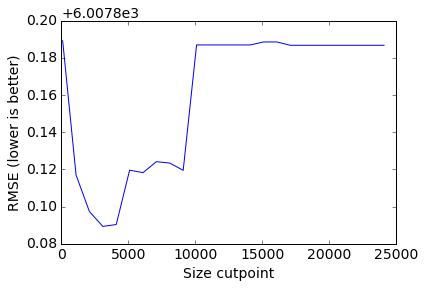

In [178]:
size_range = range(kiva['size'].min(), kiva['size'].max(), 1000)
RMSE = [size_split(size) for size in size_range]

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(size_range, RMSE)
plt.xlabel('Size cutpoint')
plt.ylabel('RMSE (lower is better)')

In [179]:
kiva['Bucket_new'] = kiva.Bucket.map({1:1, 2:1,3:1,6:0,7:0})

features_cols = ['Bucket','size', 'trustee_new','conversations', 'invited_lenders', 'term' ]  
#kiva_truncated = kiva[features_cols]
#kiva_truncated = kiva_truncated.dropna()

features_cols


['Bucket', 'size', 'trustee_new', 'conversations', 'invited_lenders', 'term']

In [180]:
X = kiva[features_cols].drop(kiva[features_cols].columns[0], axis = 1)
X = X.fillna(0)


y = kiva.Bucket
y = y.fillna(0)

print X.shape
print y.shape

#job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)
#df[1].fillna(0, inplace=True)

(2414, 5)
(2414,)


In [181]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [182]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

2.4126261505074886

In [183]:
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.82219308678808

In [184]:
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

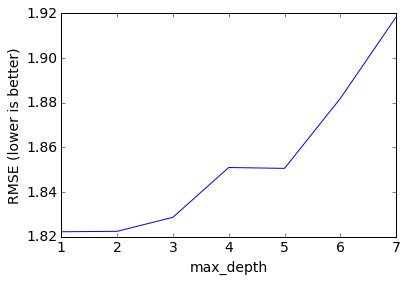

In [185]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [191]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [194]:
treereg.feature_importances_

#X.columns

array([ 0.73804404,  0.17470114,  0.        ,  0.        ,  0.08725482])

In [195]:
pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_})

,feature,importance
0,size,0.738044
1,trustee_new,0.174701
2,conversations,0.000000
3,invited_lenders,0.000000
4,term,0.087255


In [197]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=features_cols)